# **Exploratory Data Analysis (EDA)** of car insurance dataset

In [369]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np

import warnings
warnings.filterwarnings(action='ignore')

#Завантажую даний датасет
data = pd.read_csv("Car_Insurance_Claim.csv")
data

,Unnamed: 0,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,0,569520,65+,female,majority,0-9y,high school,upper class,0.629027313918201,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
1,1,750365,16-25,male,majority,0-9y,none,poverty,0.3577571170184627,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0
2,2,199901,16-25,female,majority,0-9y,high school,working class,0.4931457852181982,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0
3,3,478866,16-25,male,majority,0-9y,university,working class,0.2060128507324556,1.0,before 2015,0.0,none,32765,11000.0,sedan,0,0,0,0.0
4,4,731664,26-39,male,majority,10-19y,none,working class,0.3883658881572184,1.0,before 2015,0.0,0.0,32765.0,12000.0,sedan,2,0,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,323164,26-39,female,majority,10-19y,university,upper class,0.5827870696562382,1.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,1,0.0
9996,9996,910346,26-39,female,majority,10-19y,none,middle class,0.5222314755016938,1.0,after 2015,0.0,1.0,32765,NaN,sedan,1,0,0,0.0
9997,9997,468409,26-39,male,majority,0-9y,high school,middle class,0.4709402314479679,1.0,before 2015,0.0,1.0,10238,14000.0,sedan,0,0,0,0.0
9998,9998,903459,26-39,female,majority,10-19y,high school,poverty,0.3641847847297929,0.0,before 2015,0.0,1.0,10238,13000.0,sedan,2,0,1,1.0


# Preprocessing / Cleaning

Важливим процесом є ощищення даних, найважливіше тут прибрати зайві колонки, що точно не допоможуть аналізу. Також важливо вирішити, що робити із пустими клітинками. Наприклад я обрав рішення - не видаляти клітинки а замінити їх значеннями, що з'являються найчастіше. Свої логічні доводи я пояснював у коментарях над кодом.

In [379]:
def clean_inputs(df):
    df = df.copy()

    # Видалаляю колонки які не потрібні для аналізу
    df = df.drop('Unnamed: 0', axis=1)
    df = df.drop('ID', axis=1)

    # Нас не цікавлять випадки, коли OUTCOME - NaN or none
    df = df[~df['OUTCOME'].str.contains('none', na=True)]

    # Для колонок, де пропущені значення, заповнюю значенням, що зустрічається найчастіше.
    # Я вирішив так зробити, тому що це точно краще ніж видаляти увесь рядок.
    # Також це рішення мінімально вплине на датасет, невідомих полів Age наприклад 0.5 %.
    for column in ['AGE', 'GENDER','RACE', 'EDUCATION', 'INCOME', 'VEHICLE_OWNERSHIP', 'VEHICLE_YEAR','MARRIED','CHILDREN','POSTAL_CODE','ANNUAL_MILEAGE','VEHICLE_TYPE', 'SPEEDING_VIOLATIONS', 'DUIS', 'PAST_ACCIDENTS']:
        df[column] = df[column].fillna(df[column].mode()[0])

    # Якщо випадки коли клітинка - NaN зрозумілі, то випадки коли "none" - швидше за все були навмисно записані і є невеличкою помилкою працівника
    # Давайте це виправимо, тут логіка буде трішки складнішою
    for column in ['AGE','GENDER', 'RACE', 'VEHICLE_YEAR', 'POSTAL_CODE', 'ANNUAL_MILEAGE', 'VEHICLE_TYPE']:
        df[column] = df[column].replace('none', df[column].mode()[0])

    # Окремі випадки

    # Тут логічно випливає, що якщо водій не вказав стаж, отже він ще його немає, це підходить під категорію 0-9y
    df['DRIVING_EXPERIENCE'] = df['DRIVING_EXPERIENCE'].replace(['none',np.NaN], '0-9y')
    
    df['CREDIT_SCORE'] = df['CREDIT_SCORE'].replace(['none',np.NaN], 0)
    df['VEHICLE_OWNERSHIP'] = df['VEHICLE_OWNERSHIP'].replace(['none',np.NaN], 0.0)
    df['MARRIED'] = df['MARRIED'].replace(['none',np.NaN], 0.0)
    df['CHILDREN'] = df['CHILDREN'].replace(['none',np.NaN], 0.0)
    df['SPEEDING_VIOLATIONS'] = df['SPEEDING_VIOLATIONS'].replace(['none',np.NaN], 0)
    df['DUIS'] = df['DUIS'].replace(['none',np.NaN], 0)
    df['PAST_ACCIDENTS'] = df['PAST_ACCIDENTS'].replace(['none',np.NaN], 0)

    # Binary encoding
    df['GENDER'] = df['GENDER'].replace({'male': 0, 'female': 1})
    df['RACE'] = df['RACE'].replace({'majority': 0, 'minority': 1})
    df['VEHICLE_YEAR'] = df['VEHICLE_YEAR'].replace({'before 2015': 0, 'after 2015': 1})
    df['VEHICLE_TYPE'] = df['VEHICLE_TYPE'].replace({'sedan': 0, 'sports car': 1})

    # Fixing column, converting from float to int
    for column in ['VEHICLE_OWNERSHIP','MARRIED','CHILDREN', 'OUTCOME', 'POSTAL_CODE', 'ANNUAL_MILEAGE', 'SPEEDING_VIOLATIONS', 'DUIS', 'PAST_ACCIDENTS']:
        df[column] = pd.to_numeric(df[column]).astype(int)

    df['CREDIT_SCORE'] = pd.to_numeric(df['CREDIT_SCORE'])

    # Ordinal encoding
    df['INCOME'] = df['INCOME'].replace({'poverty': 0, 'working class': 1, 'middle class': 2, 'upper class': 3})
    df['EDUCATION'] = df['EDUCATION'].replace({'none': 0, 'high school': 1, 'university': 2})
    df['DRIVING_EXPERIENCE'] = df['DRIVING_EXPERIENCE'].replace({'0-9y': 0, '10-19y': 1, '20-29y': 2, '30y+': 3})
    df['AGE'] = df['AGE'].replace({'16-25': 0, '26-39': 1, '40-64': 2, '65+': 3})

    return df

insurance = clean_inputs(data)

### Наведений нижче код, сильно спростив мені процес очищення показуючи колонки де може бути присутнє значення NaN або 'none'

In [380]:
insurance.applymap(lambda x: x == 'none').sum()
# insurance

AGE                    0
GENDER                 0
RACE                   0
DRIVING_EXPERIENCE     0
EDUCATION              0
INCOME                 0
CREDIT_SCORE           0
VEHICLE_OWNERSHIP      0
VEHICLE_YEAR           0
MARRIED                0
CHILDREN               0
POSTAL_CODE            0
ANNUAL_MILEAGE         0
VEHICLE_TYPE           0
SPEEDING_VIOLATIONS    0
DUIS                   0
PAST_ACCIDENTS         0
OUTCOME                0
dtype: int64

In [381]:
insurance.applymap(lambda x: x is np.nan).sum()

AGE                    0
GENDER                 0
RACE                   0
DRIVING_EXPERIENCE     0
EDUCATION              0
INCOME                 0
CREDIT_SCORE           0
VEHICLE_OWNERSHIP      0
VEHICLE_YEAR           0
MARRIED                0
CHILDREN               0
POSTAL_CODE            0
ANNUAL_MILEAGE         0
VEHICLE_TYPE           0
SPEEDING_VIOLATIONS    0
DUIS                   0
PAST_ACCIDENTS         0
OUTCOME                0
dtype: int64

### Нижче наведений код також є процесом очищення від даних, що не є числовими значеннями. Це потрібно було зробити для того, щоб знайти кореляцію між даними.

In [382]:
{column: len(insurance[column].unique()) for column in insurance.select_dtypes('object').columns}

{}

### Після всіх операцій можна побачити датасет - чистий та готовий до аналізу

In [383]:
insurance

,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,3,1,0,0,1,3,0.629027,1,1,0,1,10238,12000,0,0,0,0,0
1,0,0,0,0,0,0,0.357757,0,0,0,0,10238,16000,0,0,0,0,1
2,0,1,0,0,1,1,0.493146,1,0,0,0,10238,11000,0,0,0,0,0
3,0,0,0,0,2,1,0.206013,1,0,0,0,32765,11000,0,0,0,0,0
4,1,0,0,1,0,1,0.388366,1,0,0,0,32765,12000,0,2,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1,1,0,1,2,3,0.582787,1,0,0,0,10238,16000,0,0,0,1,0
9996,1,1,0,1,0,2,0.522231,1,1,0,1,32765,11000,0,1,0,0,0
9997,1,0,0,0,1,2,0.470940,1,0,0,1,10238,14000,0,0,0,0,0
9998,1,1,0,1,1,0,0.364185,0,0,0,1,10238,13000,0,2,0,1,1


# **Аналіз даних**
Спершу потрібно зрозуміти, що таке OUTCOME: 1. Для цього необхідно правильно перекласти текст завдання:  

*Переклад:*  

Процес повідомлення вашої страхової компанії про те, що ви потрапили в ДТП. Оскільки ви працюєте в страховій компанії, компанія хоче знати причину, **чому страхова заява не була подана**. Розуміючи це, страхова компанія могла б вдосконалити свою політику щодо надання позики клієнту. У цьому проекті ви працюєте з різними параметрами, такими як вік, професія тощо.

Тепер ми краще розуміємо, що таке OUTCOME, **але всерівно неясно що значить, OUTCOME: 1 чи 0**. З'ясуємо це аналітично.

(-1.0999998822890031, 1.0999995753534, -1.099999416398037, 1.0999999722094302)

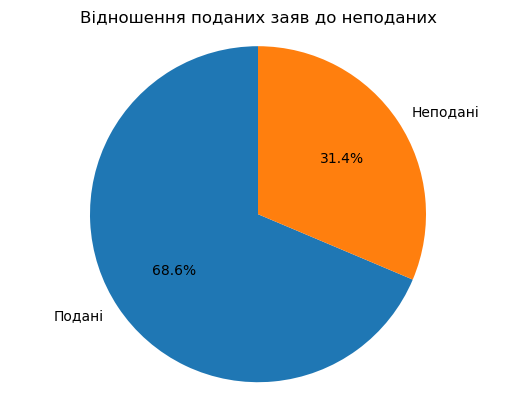

In [384]:
plt.pie(x=insurance['OUTCOME'].value_counts(), startangle=90, autopct='%1.1f%%', labels = ['Подані','Неподані'])
plt.title("Відношення поданих заяв до неподаних")
plt.axis('equal')

Аналізуючи круговий графік, **я припускаю - що неподних заяв менше ніж поданих**.  

### Отже, OUTCOME: 1 - є "позитивним" результатом для компанії, так як непотрібно буде робити виплати. OUTCOME: 1 - це неподані заявки, з тих чи інших причин, саме цей випадок нас і цікавить.

# З'ясувавши, що таке OUTCOME, будуємо таблицю кореляцій

In [385]:
corr = insurance.corr()
corr

,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
AGE,1.000000,-0.004442,-0.013531,0.697406,0.254280,0.651260,0.312519,0.269274,0.229452,0.377084,0.377488,0.009334,-0.258708,-0.007254,0.452778,0.280342,0.427830,-0.446075
GENDER,-0.004442,1.000000,0.007792,-0.002543,-0.077788,-0.025272,0.039156,-0.006990,-0.010925,-0.004867,0.002898,0.001196,0.015580,-0.000349,-0.197942,-0.092027,-0.215199,-0.105654
RACE,-0.013531,0.007792,1.000000,-0.024128,-0.110597,-0.054931,-0.007364,-0.037617,-0.022949,-0.019808,0.005981,0.004949,-0.001588,0.005134,-0.018082,-0.016127,-0.012326,0.008917
DRIVING_EXPERIENCE,0.697406,-0.002543,-0.024128,1.000000,0.180345,0.457968,0.213929,0.199244,0.160659,0.261983,0.274491,0.004222,-0.173213,-0.008907,0.622220,0.390482,0.596211,-0.491329
EDUCATION,0.254280,-0.077788,-0.110597,0.180345,1.000000,0.555932,0.248431,0.228649,0.195642,0.184890,0.123392,0.021937,-0.119822,-0.006854,0.140378,0.089804,0.124497,-0.187460
INCOME,0.651260,-0.025272,-0.054931,0.457968,0.555932,1.000000,0.457504,0.416485,0.355605,0.389831,0.290222,0.020128,-0.248624,-0.010769,0.308893,0.193168,0.287646,-0.423507
CREDIT_SCORE,0.312519,0.039156,-0.007364,0.213929,0.248431,0.457504,1.000000,0.194650,0.168033,0.177149,0.130020,-0.005049,-0.100677,-0.008695,0.121661,0.075362,0.114750,-0.195875
VEHICLE_OWNERSHIP,0.269274,-0.006990,-0.037617,0.199244,0.228649,0.416485,0.194650,1.000000,0.154766,0.167250,0.119721,-0.001943,-0.089945,0.004786,0.134639,0.087895,0.118959,-0.375791
VEHICLE_YEAR,0.229452,-0.010925,-0.022949,0.160659,0.195642,0.355605,0.168033,0.154766,1.000000,0.126449,0.102217,0.007916,-0.073017,-0.024250,0.101720,0.048259,0.094518,-0.290855
MARRIED,0.377084,-0.004867,-0.019808,0.261983,0.184890,0.389831,0.177149,0.167250,0.126449,1.000000,0.283502,0.012609,-0.429838,0.003797,0.215789,0.117314,0.210138,-0.261406


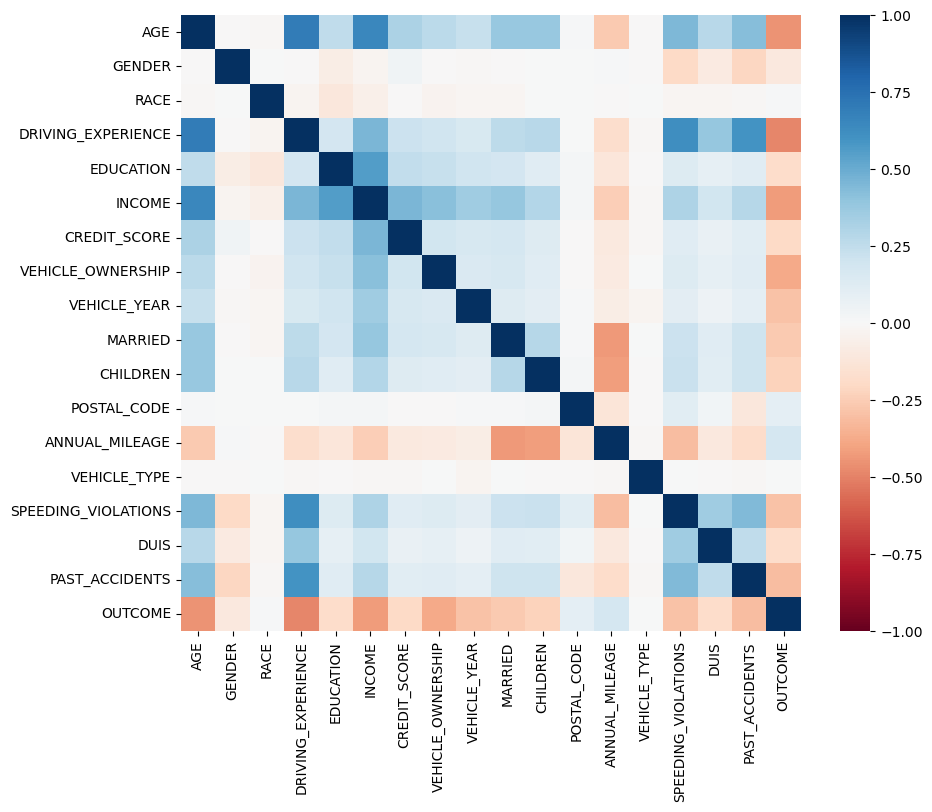

In [392]:
plt.figure(figsize=(10,8))
sns.heatmap(corr, cmap='RdBu', vmin=-1, vmax=1)
plt.show()

# Аналізуючи heatmap, можна побачити цікаві залежності

- З ростом EDUCATION спостерігається ріст INCOME
- З ростом DRIVING_EXPERIENCE спостерігається ріст SPEEDING_VIOLATIONS
- Очевидно, що з ростом DRIVING_EXPERIENCE росте й AGE

Взагалі дивлячись на даний графік можна побачити ще багато цікавих залежностей, але нас найбільше цікавить OUTCOME:

**Залежності для OUTCOME:**

- З **більшим досвідом** (DRIVING_EXPERIENCE) кількість неподаних заявок **зменшується**(OUTCOME)
- З **більшим доходом** (INCOME) кількість неподаних заявок **зменшується**(OUTCOME)
- З **більшим віком** (AGE) кількість неподаних заявок **зменшується**(OUTCOME)

Звісно усі залежності неварто розглядати, так як вони мають **слабкі кореляції** - це, наприклад VEHICLE_TYPE, RACE, GENDER, POSTAL_CODE

# Розглядаючи DRIVING_EXPERIENCE більш детальніше

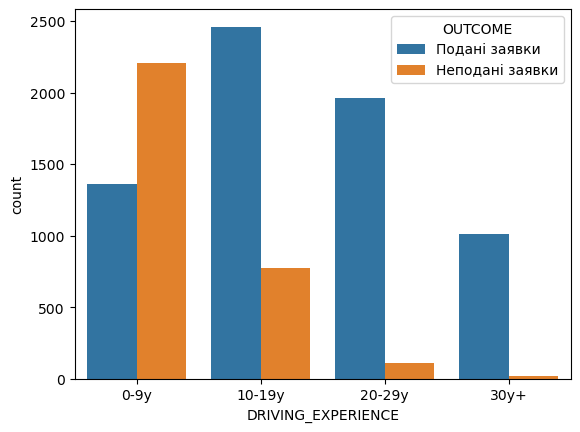

In [397]:
# Змінюю значиння OUTCOME для зручності
insurance['OUTCOME'] = insurance['OUTCOME'].replace({0: 'Подані заявки', 1: 'Неподані заявки'})

sns.countplot(data=insurance, x='DRIVING_EXPERIENCE', hue='OUTCOME')

# Змінюю значиння DRINVING_EXPERIENCE для зручності
plt.xticks(ticks=range(4), labels=['0-9y', '10-19y', '20-29y', '30y+'])

plt.show()


### Висновок: Для груп з досвідом від 0-9y властиво неподавати заявки, це також відбувається набагато частіше ніж у груп з більшим досвідом.

# Розглядаючи AGE більш детальніше

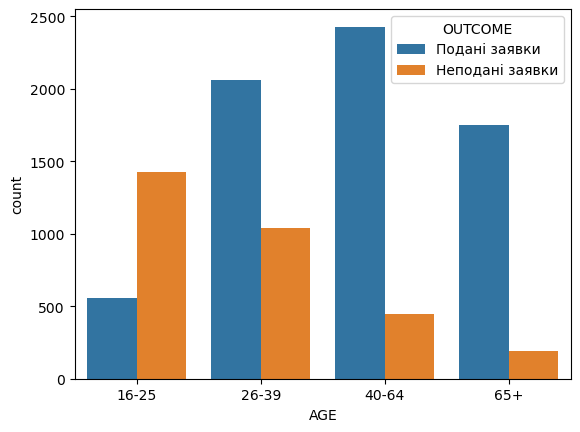

In [399]:
sns.countplot(data=insurance, x='AGE', hue='OUTCOME')

# Змінюю значиння AGE для зручності
plt.xticks(ticks=range(4), labels=['16-25', '26-39', '40-64', '65+'])

plt.show()

### Висновок: Для груп віком від 16-25 властиво неподавати заявки, це також відбувається набагато частіше ніж у груп з більшим віком.

# Розглядаючи VEHICLE_OWNERSHIP більш детальніше

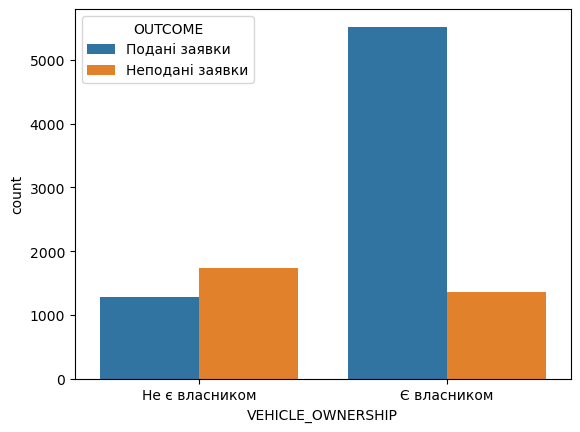

In [402]:
sns.countplot(data=insurance, x='VEHICLE_OWNERSHIP', hue='OUTCOME')

# Змінюю значиння AGE для зручності
plt.xticks(ticks=range(2), labels=['Не є власником','Є власником'])

plt.show()

### Висновок: Власники автівок зазвичай подають заявки і роблять це частіше ніж водії, що позичили авто. Тоді як не власники авто не подають заявки дуже часто(*щоб приховати факт потрапляння в ДТП*)

# Розглядаючи Порушення

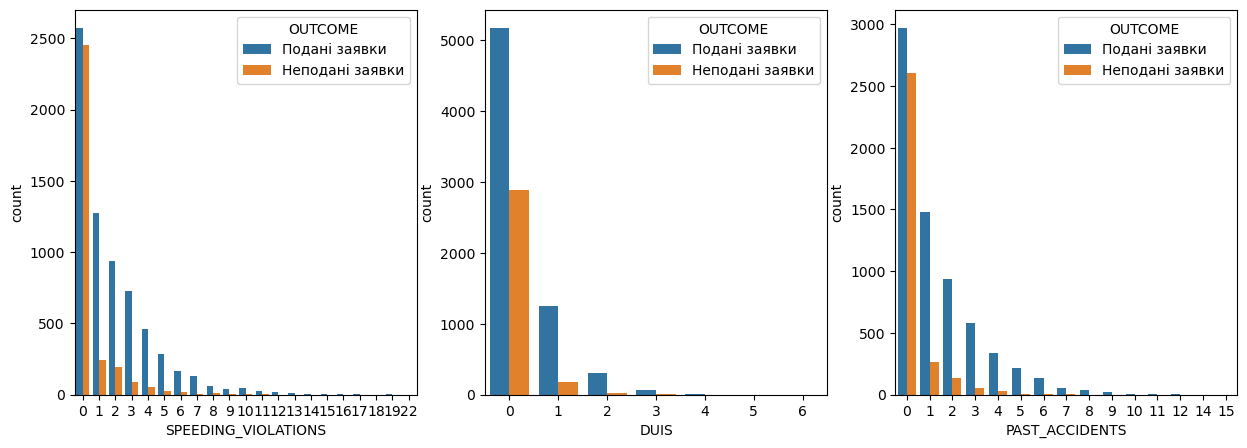

In [411]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

sns.countplot(data=insurance, x='SPEEDING_VIOLATIONS', hue='OUTCOME', ax=axes[0])
sns.countplot(data=insurance, x='DUIS', hue='OUTCOME', ax=axes[1])
sns.countplot(data=insurance, x='PAST_ACCIDENTS', hue='OUTCOME', ax=axes[2])

plt.show()

# Фінальний Висновок

### Чому страхова заявка не була подана?

*Спираючись на попередні висновки:*

- **Боязнь підвищення страхового тарифу**. Подача заявки може призвести до підвищення страхових внесків у майбутньому.
- **Якщо пошкодження незначне і водій не є винуватцем ДТП**
- **Угода без участі страхової**. Водії можуть домовитися між собою вирішити питання без залучення страхової, особливо якщо пошкодження невеликі.
- **Незнання процесу**. Нові водії або ті, хто не мав справи зі страховими вимогами раніше, можуть просто не знати процедуру або вважати її занадто складною.
- **Водій є винуватцем ДТП і тому не подає заяви, намагаючись приховати цей факт**
- **Водій не є власником автівки**


Аналізуючи представлений датасет можна скласти "*типовий портрет*" водія, що **не оформив заявку** з тих чи інших причин:

*Водій:*
- **Молодий, віком 16-25**
- **Має малий стаж водіння 0-9y**
- **Немає освіти**
- **Має малий дохід**
- **Має погану кредитну історію**
- **Не є власником автівки**
- **Має стару автівку, до 2015**
- **Не одружений**
- **Немає дітей**
- **Ще немає жодного порушення**



